In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

%matplotlib inline
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image

Set the `Constant Values`

In [2]:
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10
CHANNELS = 3

Import Data

In [3]:
train_data = tf.keras.preprocessing.image_dataset_from_directory("data/Flower-Classification/train/",
                                                                 shuffle=True,
                                                                 image_size=(IMG_SIZE, IMG_SIZE),
                                                                 batch_size=BATCH_SIZE)

Found 13642 files belonging to 14 classes.


In [4]:
class_name = train_data.class_names
class_name

['astilbe',
 'bellflower',
 'black_eyed_susan',
 'calendula',
 'california_poppy',
 'carnation',
 'common_daisy',
 'coreopsis',
 'dandelion',
 'iris',
 'rose',
 'sunflower',
 'tulip',
 'water_lily']

Plot the `images`

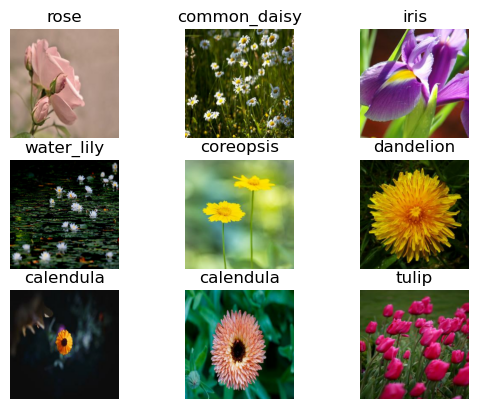

In [6]:
for images, labels in train_data.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_name[labels[i]])
        plt.axis("off")

plt.show()

Split the train_data

In [7]:
def create_data_batch(dataset,train_split=0.8,val_split=0.2,shuffle=True,shuffle_size=1000):
      ds_size = len(dataset)
      if shuffle:
        dataset = dataset.shuffle(shuffle_size,seed=12)
      train_size = int(ds_size*train_split)
      val_size = int(ds_size*val_split)

      train_ds = dataset.take(train_size)
      val_ds = dataset.skip(train_size).take(val_size)

      return train_ds,val_ds

In [8]:
train_ds, val_ds = create_data_batch(train_data)

`Resize` input image

In [9]:
rescaling_resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255),
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE,IMG_SIZE)
])

Model Building

In [10]:
model = tf.keras.Sequential([
    rescaling_resize,
    keras.layers.Conv2D(14, kernel_size=(3,3), activation="relu", input_shape=(BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(40, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(60, kernel_size=(3,3), activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(14, activation="softmax")
])

model.build((BATCH_SIZE, IMG_SIZE, IMG_SIZE, CHANNELS))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 224, 224, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 222, 222, 14)        392       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 111, 111, 14)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 109, 109, 40)        5080      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 54, 54, 40)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 52, 52, 60)         

In [12]:
model.compile(optimizer="adam", loss=tf.losses.sparse_categorical_crossentropy, metrics="acc")

In [13]:
model1 = model.fit(train_ds, validation_data=val_ds, epochs = EPOCHS)

Epoch 1/10
341/341 [==============================] - 450s 1s/step - loss: 1.7182 - acc: 0.3985 - val_loss: 1.2662 - val_acc: 0.5629
Epoch 2/10
341/341 [==============================] - 310s 869ms/step - loss: 1.2019 - acc: 0.5849 - val_loss: 0.9852 - val_acc: 0.6665
Epoch 3/10
341/341 [==============================] - 289s 811ms/step - loss: 0.8656 - acc: 0.7035 - val_loss: 0.6697 - val_acc: 0.7779
Epoch 4/10
341/341 [==============================] - 331s 928ms/step - loss: 0.5976 - acc: 0.8010 - val_loss: 0.3724 - val_acc: 0.8831
Epoch 5/10
341/341 [==============================] - 503s 1s/step - loss: 0.3568 - acc: 0.8803 - val_loss: 0.2617 - val_acc: 0.9121
Epoch 6/10
341/341 [==============================] - 287s 801ms/step - loss: 0.2098 - acc: 0.9314 - val_loss: 0.1407 - val_acc: 0.9548
Epoch 7/10
341/341 [==============================] - 293s 820ms/step - loss: 0.1336 - acc: 0.9576 - val_loss: 0.0656 - val_acc: 0.9824
Epoch 8/10
341/341 [==============================] - 

In [18]:
model1.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

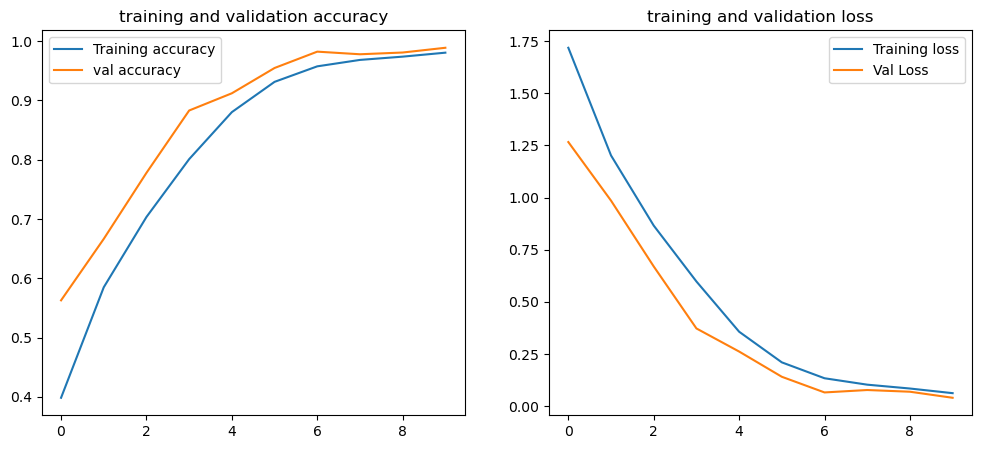

In [19]:
loss = model1.history["loss"]
acc = model1.history["acc"]
val_loss = model1.history["val_loss"]
val_acc = model1.history["val_acc"]

# Accuracy for training and val
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label="Training accuracy")
plt.plot(range(EPOCHS),val_acc,label="val accuracy")
plt.legend()
plt.title("training and validation accuracy")

# loss for val and training
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training loss")
plt.plot(range(EPOCHS),val_loss,label="Val Loss")
plt.legend()
plt.title("training and validation loss");

Testing with `External Image`

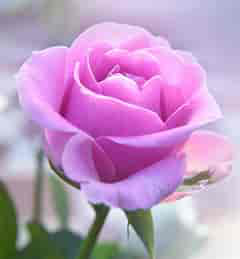

In [51]:
img = Image.open("D:\\image for testing\\rose.jpeg")
img

In [52]:
img_array = tf.keras.preprocessing.image.img_to_array(img)
image = np.expand_dims(img_array, axis=0)
image.shape

(1, 259, 240, 3)

In [53]:
predicted = model.predict(image)
predicted

1/1 [==============================] - 0s 31ms/step


array([[1.6708773e-02, 2.2817373e-04, 2.0700632e-09, 6.5768322e-06,
        1.4606168e-03, 2.6737031e-01, 1.6075228e-05, 3.3828519e-06,
        1.6090365e-07, 8.8272391e-05, 4.4255501e-01, 3.1954578e-08,
        2.7155918e-01, 3.4622615e-06]], dtype=float32)

In [54]:
print(f"Predicted Image: {class_name[np.argmax(predicted)]}")

Predicted Image: rose


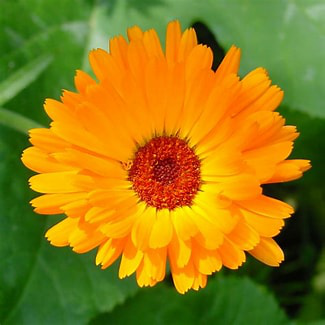

In [42]:
img2 = Image.open("D:\\image for testing\\calendula.jpeg")
img2

In [49]:
img_array = tf.keras.preprocessing.image.img_to_array(img2)
image = np.expand_dims(img_array, axis=0)
predicted = model.predict(image)
print(f"Predicted Image: {class_name[np.argmax(predicted)]}")

1/1 [==============================] - 0s 25ms/step
Predicted Image: calendula


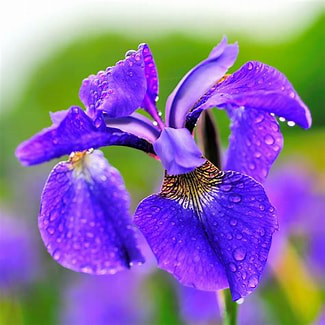

In [46]:
img3 = Image.open("D:\\image for testing\\ires.jpeg")
img3

In [48]:
img_array = tf.keras.preprocessing.image.img_to_array(img3)
image = np.expand_dims(img_array, axis=0)
predicted = model.predict(image)
print(f"Predicted Image: {class_name[np.argmax(predicted)]}")

1/1 [==============================] - 0s 22ms/step
Predicted Image: iris


save the model in `h5 file`

In [40]:
#model.save("C:\\Users\\vicky\\desktop\\sample_project_1\\saved_models\\flower_prediction.h5")